In [48]:
import numpy as np
import numpy.testing as npt
import seaborn as sns
%matplotlib inline

There are 2K tables!
Dice rolls are distributed as a multinomial (aka categorical) distribution.
Each player visits K tables. So the number of timesteps in the model is equal to the number of tables. Use a list of vectors to hold the dice rolls. A set of observations for a single player is a vector containing the sums of their dice rolls at each table. The overall observation set will be a vector of vectors containing the set of observations for each player per vector.

In [49]:
#global state

num_players = 10
K = 10000
num_tables = 2*K
die_sides = 6
timesteps = K

In [50]:
# class Player:
#     def __init__(self):
        

# Generate Distributions

In [51]:
pval_uniform = np.array([1/float(die_sides)] * die_sides)
pval_table_goodbias = [0.02, 0.02, 0.2, 0.2, 0.2, 0.36]
pval_table_badbias = [0.3, 0.3, 0.1, 0.1, 0.1, 0.1]
pval_player_bias = pval_uniform
npt.assert_almost_equal(np.sum(pval_uniform), 1)
npt.assert_almost_equal(np.sum(pval_table_badbias), 1)
npt.assert_almost_equal(np.sum(pval_table_goodbias), 1)


# Roll some dice!

Loop through 1 to K

For each step, use a function to return a distribution.

Roll a dice using the distribution as the tables distribution. Roll a dice using the player distribution. Sum it up, and put it in a vector.

In [52]:
def dice_roll(distribution):
    return np.random.choice([1,2,3,4,5,6], 1, True, distribution)

def get_distro(current_dist):
    if current_dist == 0:
        table_transition = [0.25, 0.75]
    else:
        table_transition = [0.75, 0.25]    
    return np.random.choice([0,1], 1, True, table_transition)
    

In [53]:
def visit_tables(table_dists):
    dist_index = 0
    current_distro = table_dists[0]
    player_rolls = np.zeros(K)
    table_rolls = np.zeros(K)
    dice_sums = np.zeros(K)
    for i in range(K):
        dist_index = get_distro(dist_index)
        table_rolls[i] = dice_roll(table_dists[dist_index[0]])
        player_rolls[i] = dice_roll(pval_player_bias)
        dice_sums[i] = table_rolls[i] + player_rolls[i]
    return dice_sums

# What if all of the dice are uniform?

In [54]:
overall_observations = np.zeros((num_players, K))
table_dists = [pval_uniform, pval_uniform]
for player in range(num_players):
    overall_observations[player] = visit_tables(table_dists)
    

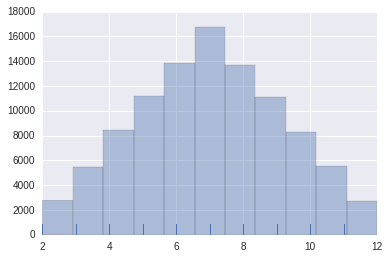

In [55]:
sns.distplot(np.concatenate(overall_observations),bins=11, kde=False, rug=True)

# What if all the dice are uniform except one?

In [56]:
overall_observations = np.zeros((num_players, K))
table_dists = [pval_uniform, pval_table_goodbias]
for player in range(num_players):
    overall_observations[player] = visit_tables(table_dists)

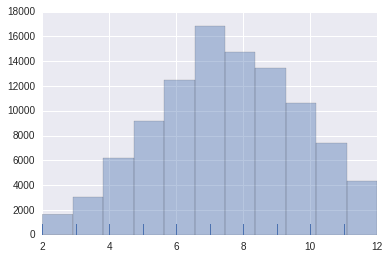

In [57]:
sns.distplot(np.concatenate(overall_observations),bins=11, kde=False, rug=True)

# What if all are bad/biased?
We'll give the table a good bias, and the player a bad bias



In [58]:
overall_observations = np.zeros((num_players, K))
table_dists = [pval_table_goodbias, pval_table_goodbias]
for player in range(num_players):
    overall_observations[player] = visit_tables(table_dists)

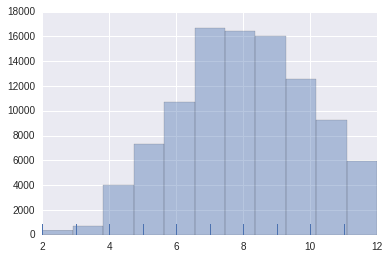

In [59]:
sns.distplot(np.concatenate(overall_observations),bins=11, kde=False, rug=True)